In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np


miseq_heavy_9cls=pd.read_csv("miseq_heavy_9cls_uni.csv",index_col=0)
gen1_heavy_9cls=pd.read_csv("gen1_heavy_9cls_uni.csv",index_col=0)
gen2_heavy_9cls=pd.read_csv("gen2_heavy_9cls_uni.csv",index_col=0)

# miseq_light_9cls=pd.read_csv("miseq_light_9cls_uni.csv",index_col=0)
# gen1_light_9cls=pd.read_csv("gen1_light_9cls_uni.csv",index_col=0)
# gen2_light_9cls=pd.read_csv("gen2_light_9cls_uni.csv",index_col=0)

cols = ['WSU-NHL', 'WSU-DLCL', 'LB5871-LYMP', 'EHEB', 'OCI-LY1', 'RI-1', 'DAUDI', 'JK-6', 'MEC-1']

miseq_heavy_9cls = miseq_heavy_9cls.reindex(columns=cols)
gen1_heavy_9cls = gen1_heavy_9cls.reindex(columns=cols)
gen2_heavy_9cls = gen2_heavy_9cls.reindex(columns=cols)

# miseq_light_9cls = miseq_light_9cls.reindex(columns=cols)
# gen1_light_9cls = gen1_light_9cls.reindex(columns=cols)
# gen2_light_9cls = gen2_light_9cls.reindex(columns=cols)

new_order_h = [
    '2-MME-L1-HC', '2-MME-L2-HC', '2-MME-L3-HC',
    '2-D1-L1-HC', '2-D1-L2-HC', '2-D1-L3-HC',
    '2-D2-L1-HC', '2-D2-L2-HC', '2-D2-L3-HC',
    '2-D3-L1-HC', '2-D3-L2-HC', '2-D3-L3-HC',
    '2-D4-L1-HC', '2-D4-L2-HC', '2-D4-L3-HC',
    '2-D5-L1-HC', '2-D5-L2-HC', '2-D5-L3-HC',
    '2-PBMC-L1-HC', '2-PBMC-L2-HC', '2-PBMC-L3-HC',
    '3-MMC-L1-HC', '3-D1-L1-HC', '3-D2-L1-HC',
    '3-D3-L1-HC', '3-D4-L1-HC', '3-D5-L1-HC', '3-PBMC-L1-HC'
]

gen2_heavy_9cls = gen2_heavy_9cls.reindex(new_order_h)
normalize = False

if normalize:
    tpm = pd.read_excel('BCR-SEQC_50_cell_lines_IG_TPM.xlsx', index_col=0)
    tpm = tpm.loc[cols]

    mean_h = tpm['Heavy'].mean()
    mean_l = tpm['Light'].mean()

    tpm['sf_mean_heavy'] = mean_h / tpm['Heavy']
    tpm['sf_mean_light'] = mean_l / tpm['Light']

    for col in gen2_heavy_9cls.columns:
        if col in tpm.index:
            gen2_heavy_9cls[col] = gen2_heavy_9cls[col].apply(
                lambda x: x * tpm.loc[col, 'sf_mean_heavy'] if pd.notnull(x) else x
            )


In [ ]:

# index_names = ['2-PBMC-L1-LC', '2-PBMC-L2-LC', '2-PBMC-L3-LC', '3-PBMC-L1-LC']

# miseq_light_9cls.loc[index_names, :] = np.nan
# gen1_light_9cls.loc[index_names, :] = np.nan
# gen2_light_9cls.loc[index_names, :] = np.nan


# colors = sns.color_palette(['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8'])
# sns.palplot(colors)
# plt.show()

/tmp/ipykernel_16796/2423991393.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)


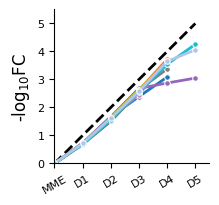

In [23]:


group2 = "gen2_heavy_9cls"
df_raw = globals()[group2].copy()

df_raw = df_raw[~df_raw.index.str.startswith('3-')]
# df_raw = df_raw[~df_raw.index.str.contains('PBMC')]
df = df_raw.copy()

df.index = df.index.map(lambda x: x.split('-')[1] if '-' in x else x)
df['group'] = np.repeat(np.arange(len(df) // 3), 3)

# Group by 'group' column and then take the mean
df_grouped = df.groupby('group').mean()

new_index = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']
# new_index = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5']

df_grouped.index = new_index
df = df_grouped.copy()

df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)

colors = sns.color_palette(['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8'])

plt.figure(figsize=(2, 2))


x = np.arange(0, 6, 1)
sns.lineplot(x=x, y=x, color='black', label='Standard curve', linewidth=2, linestyle='--')#, alpha=0.5)

# Plot the data
for i in range(df_log.shape[1]):
    y = df_log.iloc[:, i] - df_log.iloc[0, i]
    # Exclude inf values
    y = y.replace([np.inf, -np.inf], np.nan)
    sns.lineplot(x=np.arange(len(y)), y=y, marker='o', markersize=4,
                 color=colors[i],
                 label=df_log.columns[i], linewidth=2)#, alpha=0.5)

plt.ylim(0, 5.5)
plt.xlim(0, 5.5)
plt.ylabel("-log$_{10}$FC", fontsize=12)
# plt.title('D. Clonal frequency linearity', fontsize=24)

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(ticks=np.arange(6), labels=df_log.index[:6], fontsize=8, rotation=30)
plt.yticks(ticks=np.arange(6), fontsize=8)


plt.legend(loc='upper center', handletextpad=0.5, markerscale=0.5, handleheight=1, handlelength=1, labelspacing=0.2,bbox_to_anchor=(0.5, -0.1), ncol=5, fontsize=10)
plt.gca().legend_.remove()
#plt.tight_layout()


if normalize:
    plt.savefig('Figure4D_MME_normalized.svg')
else:
    plt.savefig('Figure4D_MME.svg')

plt.show()

/tmp/ipykernel_16796/2633997221.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)


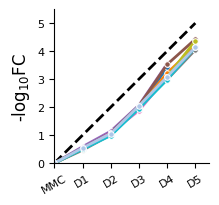

In [25]:
group3 = "gen2_heavy_9cls"
df_raw = globals()[group3].copy()

df_raw=df_raw[~df_raw.index.str.startswith('2-')]
df=df_raw.copy()
df.index = df.index.map(lambda x: x.split('-')[1] if '-' in x else x)



new_index=['MMC','D1','D2','D3','D4','D5','PBMC']
df.index=new_index

df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)

plt.figure(figsize=(2, 2))


# Draw y=x line
x = np.arange(0, 6, 1)
sns.lineplot(x=x, y=x, color='black',
             linewidth=2,linestyle='--',
             label='Standard curve')

for i in range(df_log.shape[1]):
    y = df_log.iloc[:, i] - df_log.iloc[0, i]
    sns.lineplot(x=np.arange(6), y=y[:6], marker='o',markersize=4,
                 color=colors[i], label=df_log.columns[i],
                 linewidth=2
                 )



plt.ylim(0, 5.5)
plt.xlim(0, 5.5)
plt.ylabel("-log$_{10}$FC", fontsize=12)

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')


# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Change the x-axis ticks to the row index names of df_log
plt.xticks(ticks=np.arange(6), labels=df_log.index[:6], fontsize=8, rotation=30)
plt.yticks(ticks=np.arange(6),fontsize=8)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, fontsize=14)
plt.gca().legend_.remove()

if normalize:
    plt.savefig('Figure4D_MMC_normalized.svg')
else:
    plt.savefig('Figure4D_MMC.svg')

plt.show()

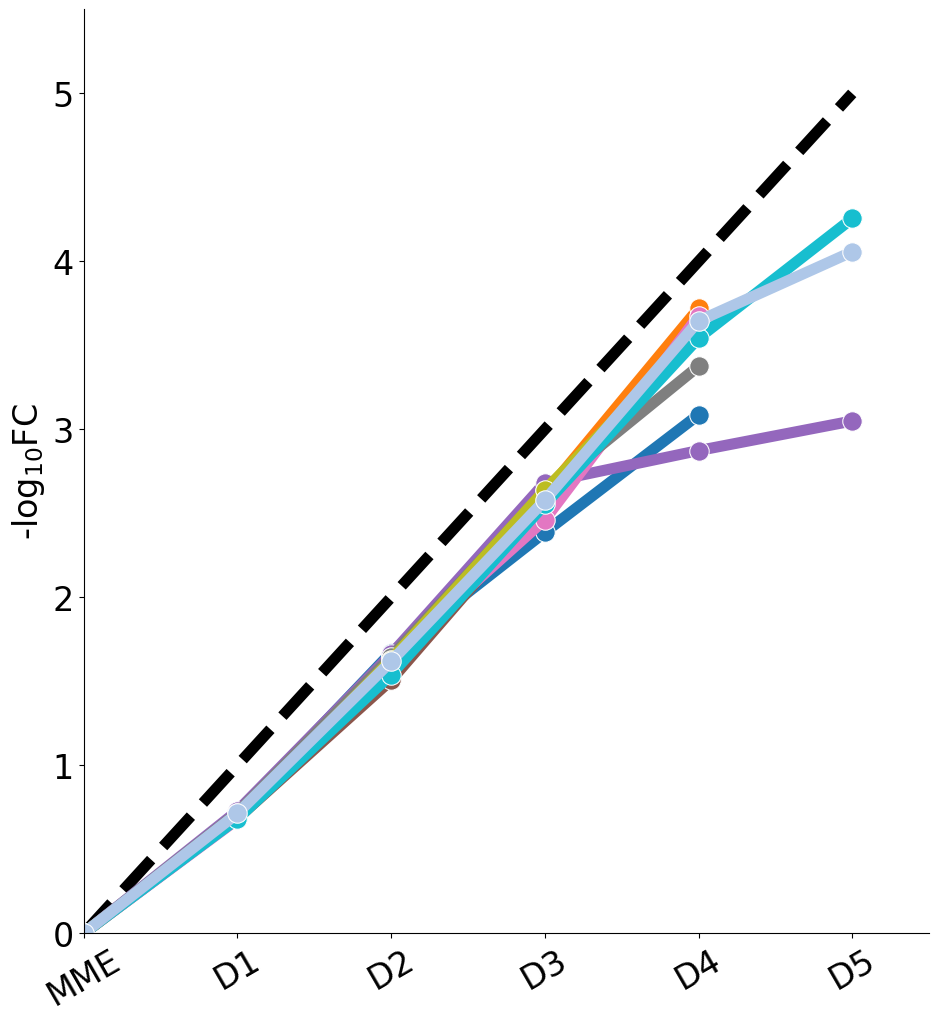

In [4]:



group2 = "gen2_heavy_9cls"
df_raw = globals()[group2].copy()

df_raw = df_raw[~df_raw.index.str.startswith('3-')]
df = df_raw.copy()

df.index = df.index.map(lambda x: x.split('-')[1] if '-' in x else x)
df['group'] = np.repeat(np.arange(len(df) // 3), 3)

# Group by 'group' column and then take the mean
df_grouped = df.groupby('group').mean()

new_index = ['MME', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']
df_grouped.index = new_index
df = df_grouped.copy()

df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)

colors = sns.color_palette(['#1f77b4', '#ff7f0e', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8'])

group3 = "gen2_heavy_9cls"
df_raw2 = globals()[group3].copy()

df_raw2 = df_raw2[~df_raw2.index.str.startswith('2-')]
df2 = df_raw2.copy()
df2.index = df2.index.map(lambda x: x.split('-')[1] if '-' in x else x)

new_index2 = ['MMC', 'D1', 'D2', 'D3', 'D4', 'D5', 'PBMC']
df2.index = new_index2

df_log2 = df2.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)

plt.figure(figsize=(24, 12))

# First plot
plt.subplot(1, 2, 1)
x = np.arange(0, 6, 1)
sns.lineplot(x=x, y=x, color='black', label='Standard curve', linewidth=8, linestyle='--')

for i in range(df_log.shape[1]):
    y = df_log.iloc[:, i] - df_log.iloc[0, i]
    y = y.replace([np.inf, -np.inf], np.nan)
    sns.lineplot(x=np.arange(len(y)), y=y, marker='o', markersize=14,
                 color=colors[i], label=df_log.columns[i], linewidth=8)

plt.ylim(0, 5.5)
plt.xlim(0, 5.5)
plt.ylabel("-log$_{10}$FC", fontsize=24)
# plt.title('D. Clonal frequency linearity', fontsize=24)

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(ticks=np.arange(6), labels=df_log.index[:6], fontsize=24, rotation=30)
plt.yticks(fontsize=24)
plt.legend().remove()

if normalize:
    plt.savefig('Figure4D_MME_normalized_.svg')
else:
    plt.savefig('Figure4D_MME_.svg')
plt.show()


In [ ]:
# Second plot
plt.subplot(1, 2, 2)
sns.lineplot(x=x, y=x, color='black',label='Standard curve',  linewidth=8, linestyle='--')

for i in range(df_log2.shape[1]):
    y = df_log2.iloc[:, i] - df_log2.iloc[0, i]
    sns.lineplot(x=np.arange(6), y=y[:6], marker='o', markersize=14,
                 color=colors[i], label=df_log2.columns[i], linewidth=8)

plt.ylim(0, 5.5)
plt.xlim(0, 5.5)

ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(ticks=np.arange(6), labels=df_log2.index[:6], fontsize=24)
plt.yticks(fontsize=24)

plt.legend(loc='upper center', bbox_to_anchor=(0, -0.1), ncol=5, fontsize=14)


['2-D1-TKB-L1-LC', '2-D1-TKB-L2-LC', '2-D1-TKB-L3-LC', '2-D2-TKB-L1-LC', '2-D2-TKB-L2-LC', '2-D2-TKB-L3-LC', '2-D3-TKB-L1-LC', '2-D3-TKB-L2-LC', '2-D3-TKB-L3-LC', '2-D4-TKB-L1-LC', '2-D4-TKB-L2-LC', '2-D4-TKB-L3-LC', '2-D5-TKB-L1-LC', '2-D5-TKB-L2-LC', '2-D5-TKB-L3-LC', '2-MME-TKB-L1-LC', '2-MME-TKB-L2-LC', '2-MME-TKB-L3-LC', '2-PBMC-TKB-L1-LC', '2-PBMC-TKB-L2-LC', '2-PBMC-TKB-L3-LC']


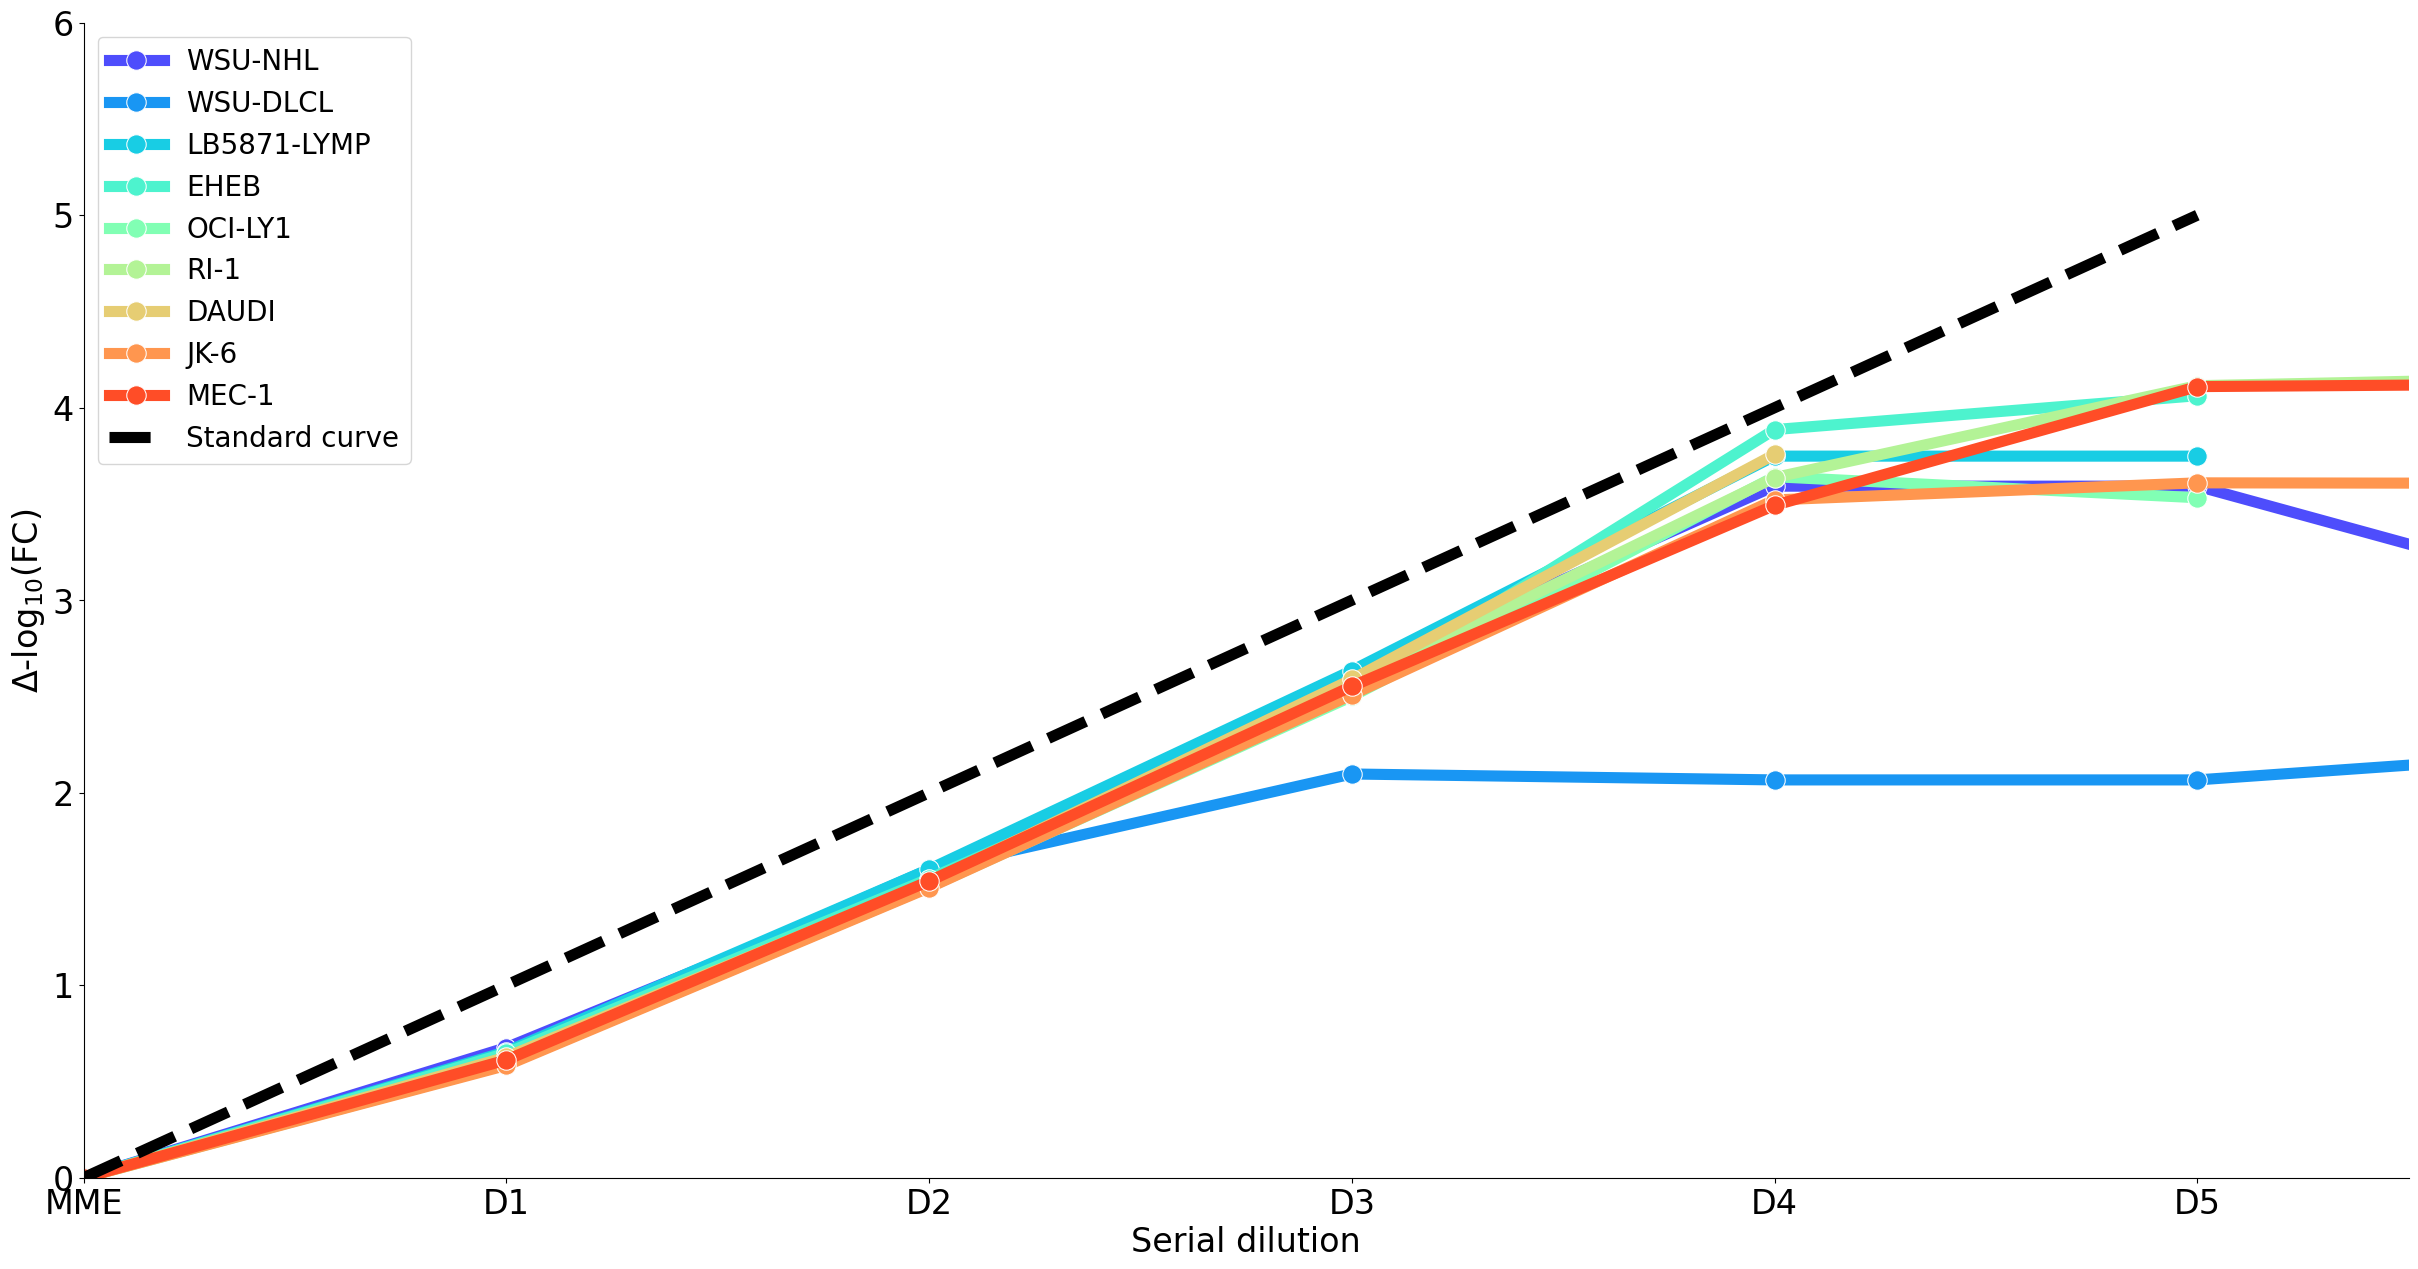

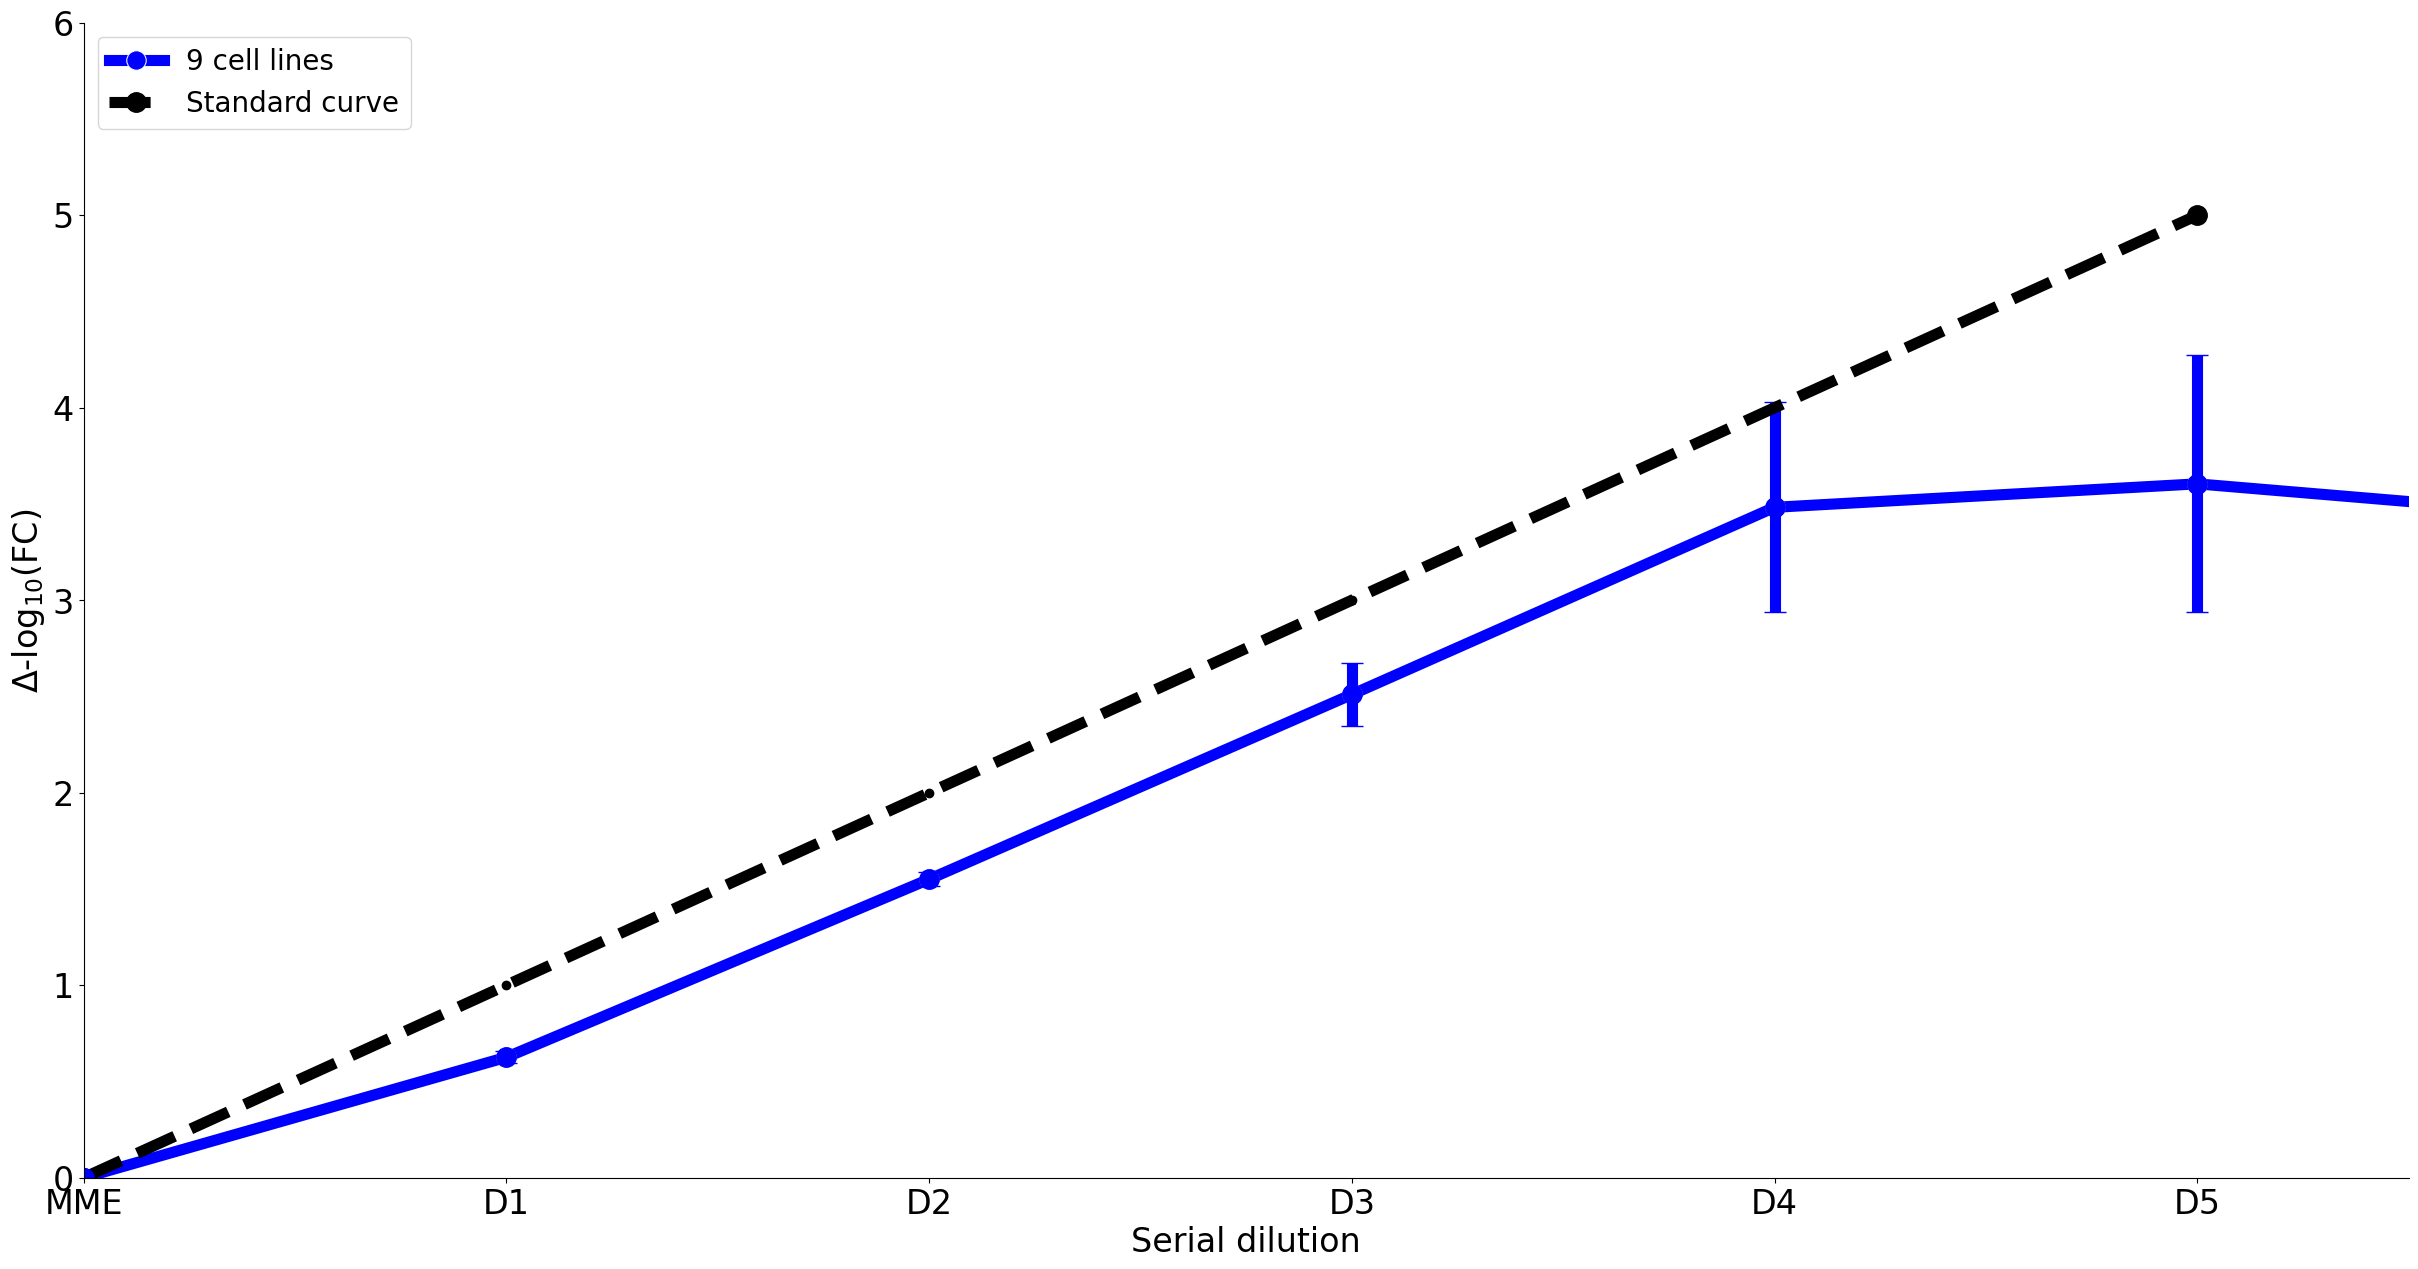

In [ ]:
group2 = "gen2_light_9cls"
df_raw = globals()[group2].copy()

# df_raw=gen1_heavy_9cls.copy()
df_raw=df_raw[~df_raw.index.str.startswith('3-')]
# df_raw=df_raw[~df_raw.index.str.contains('PBMC')]
df=df_raw.copy()

idx = df.index.tolist()  # get a list of all indices
print(idx)
#heavy
idx_to_move = ['2-MME-TKB-L1-HC', '2-MME-TKB-L2-HC', '2-MME-TKB-L3-HC']  # indices to move to the front
#light
idx_to_move = ['2-MME-TKB-L1-LC', '2-MME-TKB-L2-LC', '2-MME-TKB-L3-LC']  # indices to move to the front



# Check if these indices exist in the dataframe
if all(item in idx for item in idx_to_move):
    # remove the indices to be moved from the list
    idx = [i for i in idx if i not in idx_to_move]
    # then concatenate the lists to get the desired order
    idx = idx_to_move + idx
    # reorder the dataframe
    df = df.reindex(idx)
else:
    print("One or more indices to be moved are not in the dataframe.")
df.index = df.index.map(lambda x: x.split('-')[1] if '-' in x else x)
df['group'] = np.repeat(np.arange(len(df) // 3), 3)

# Group by 'group' column and then take the mean
df_grouped = df.groupby('group').mean()
# print(df_grouped.head(5))

new_index=['MME','D1','D2','D3','D4','D5','PBMC']
# new_index=['MME','D1','D2','D3','D4','D5']

df_grouped.index=new_index
df=df_grouped.copy()
# print(df.head(5))

df_log = df.applymap(lambda x: -np.log10(x) if pd.notnull(x) else x)

colors = sns.color_palette('rainbow', 9)

plt.figure(figsize=(30, 15))


for i in range(df_log.shape[1]):
    y = df_log.iloc[:, i] - df_log.iloc[0, i]
    # Exclude inf values
    y = y.replace([np.inf, -np.inf], np.nan)
    sns.lineplot(x=np.arange(len(y)),

                 y=y, marker='o',markersize=14,
                 color=colors[i],
                 label=df_log.columns[i],linewidth=8)

# Draw y=x line
x = np.arange(0, 6, 1)
sns.lineplot(x=x, y=x, color='black', label='Standard curve',linewidth=8,linestyle='--')
# Draw dots on y=x line
# plt.scatter(x, x, color='black')

plt.ylim(0, 6)
plt.xlim(0, 5.5)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel("Serial dilution", fontsize=24)
plt.ylabel("$\Delta$-log$_{10}$(FC)", fontsize=24)


#plt.title(f'{sample}, heavy chain, experiment 2',fontsize=16)
# plt.title(f'{sample}, heavy chain, MME',fontsize=16)


# Move the left y-axis and bottom x-axis to zero
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Change the x-axis ticks to the row index names of df_log
plt.xticks(ticks=np.arange(6), labels=df_log.index[:6], fontsize=24)
plt.yticks(fontsize=24)

# plt.savefig(f"{sample}_MME_dilute.jpg",dpi=300)
plt.savefig(f"{group2}_exp2_dilute.pdf",dpi=300)








# df_log = df_log.replace([np.inf, -np.inf], np.nan)


# df_log = df_log.dropna(how='all')
# mean = df_log.mean(axis=1, skipna=True)
# std = df_log.std(axis=1, skipna=True)
# # Calculate the difference between each mean value and the first mean value
# mean_diff = mean - mean.iloc[0]

df_diff = df_log.sub(df_log.iloc[0], axis=1)

# Replace the first row of df_diff with 0s, as subtracting the first row from itself will result in 0s
df_diff.iloc[0] = 0

# Calculate the mean for each row
mean_diff = df_diff.mean(axis=1, skipna=True)
std = df_diff.std(axis=1, skipna=True)


plt.figure(figsize=(30, 15))

# Get the length of your DataFrame
length = len(df_log)

# Plot mean difference line with error bars
sns.lineplot(x=np.arange(length), y=mean_diff,
             marker='o', markersize=14,
             color='blue',
             linewidth=8,
             label='9 cell lines')
plt.errorbar(x=np.arange(length), y=mean_diff, yerr=std, fmt='o',
             linewidth=8, markersize=14, capsize=8,color='blue')

# Add a black line y=x
max_val = max(np.max(mean_diff + std), length)  # Get the maximum value for x and y limits
plt.plot([0, 5], [0, 5], color='black', label='Standard curve',
         marker='o',
         linewidth=8, markersize=14,linestyle='--')  # Change max_val to 5
# Add dots on y=x line from (0,0) to (6,6)
for i in range(6):
    plt.scatter(i, i, color='black')

plt.ylim(0, 6)
plt.xlim(0, 5.5)
plt.legend(fontsize=20,loc='upper left')
plt.xlabel("Serial dilution", fontsize=24)
plt.ylabel("$\Delta$-log$_{10}$(FC)", fontsize=24)
# Change the x-axis ticks to the row index names of df_log

# plt.title(f'{sample}, heavy chain, MME',fontsize=16)


# Move the left y-axis and bottom x-axis to zero
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.xticks(ticks=np.arange(6), labels=df_log.index[:6],fontsize=24)
plt.yticks(fontsize=24)

plt.savefig(f"{group2}_exp2_dilute_avg.pdf",dpi=300)
# plt.savefig(f"{sample}_milab_MME_avg.jpg",dpi=300)

plt.show()

